In [1]:
# cropped all images to circle 

import cv2
import numpy as np
import os

# Function to crop and save images
def crop_and_save_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image from 1.jpg to 27.jpg
    for i in range(1, 28):
        # Read the image
        image_path = os.path.join(input_folder, f"{i}.jpg")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Could not read image {image_path}")
            continue

        # Get the center of the image
        center = (image.shape[1] // 2, image.shape[0] // 2)

        # Create a mask with a circular shape
        mask = np.zeros_like(image)
        cv2.circle(mask, center, min(center), (255, 255, 255), -1, cv2.LINE_AA)

        # Create a white background image
        background = np.ones_like(image) * 255

        # Apply the mask to the image
        result = cv2.bitwise_and(image, mask)
        background = cv2.bitwise_and(background, cv2.bitwise_not(mask))

        # Combine the cropped circular region with the white background
        result = cv2.add(result, background)

        # Save the result
        output_path = os.path.join(output_folder, f"{i}_cropped.jpg")
        cv2.imwrite(output_path, result)

        print(f"Image {i} cropped and saved as {output_path}")

# Input and output folder paths
input_folder = "samples_from_pixel"
output_folder = "pixel_cropped"

# Crop and save images
crop_and_save_images(input_folder, output_folder)


Image 1 cropped and saved as pixel_cropped\1_cropped.jpg
Image 2 cropped and saved as pixel_cropped\2_cropped.jpg
Image 3 cropped and saved as pixel_cropped\3_cropped.jpg
Image 4 cropped and saved as pixel_cropped\4_cropped.jpg
Image 5 cropped and saved as pixel_cropped\5_cropped.jpg
Image 6 cropped and saved as pixel_cropped\6_cropped.jpg
Image 7 cropped and saved as pixel_cropped\7_cropped.jpg
Image 8 cropped and saved as pixel_cropped\8_cropped.jpg
Image 9 cropped and saved as pixel_cropped\9_cropped.jpg
Image 10 cropped and saved as pixel_cropped\10_cropped.jpg
Image 11 cropped and saved as pixel_cropped\11_cropped.jpg
Image 12 cropped and saved as pixel_cropped\12_cropped.jpg
Image 13 cropped and saved as pixel_cropped\13_cropped.jpg
Image 14 cropped and saved as pixel_cropped\14_cropped.jpg
Image 15 cropped and saved as pixel_cropped\15_cropped.jpg
Image 16 cropped and saved as pixel_cropped\16_cropped.jpg
Image 17 cropped and saved as pixel_cropped\17_cropped.jpg
Image 18 croppe

In [2]:
# Apply Noise reduction (Guassian Blur)

import cv2
import numpy as np
import os

# Function to apply Gaussian blur
def process_image(image_path, output_blurred_path):
    # Load the image
    image = cv2.imread(image_path)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Save blurred image
    cv2.imwrite(output_blurred_path, blurred_image)

    # Print message
    print(f"Processed and stored {image_path.split(os.sep)[-1]}")

# Process all images from 1_cropped.jpg to 27_cropped.jpg
source_folder = 'pixel_cropped'
output_blurred_folder = 'pixel_blurred'

for i in range(1, 28):
    image_path = os.path.join(source_folder, f"{i}_cropped.jpg")
    output_blurred_path = os.path.join(output_blurred_folder, f"{i}_blurred.jpg")

    # Apply processing to the image
    process_image(image_path, output_blurred_path)


Processed and stored 1_cropped.jpg
Processed and stored 2_cropped.jpg
Processed and stored 3_cropped.jpg
Processed and stored 4_cropped.jpg
Processed and stored 5_cropped.jpg
Processed and stored 6_cropped.jpg
Processed and stored 7_cropped.jpg
Processed and stored 8_cropped.jpg
Processed and stored 9_cropped.jpg
Processed and stored 10_cropped.jpg
Processed and stored 11_cropped.jpg
Processed and stored 12_cropped.jpg
Processed and stored 13_cropped.jpg
Processed and stored 14_cropped.jpg
Processed and stored 15_cropped.jpg
Processed and stored 16_cropped.jpg
Processed and stored 17_cropped.jpg
Processed and stored 18_cropped.jpg
Processed and stored 19_cropped.jpg
Processed and stored 20_cropped.jpg
Processed and stored 21_cropped.jpg
Processed and stored 22_cropped.jpg
Processed and stored 23_cropped.jpg
Processed and stored 24_cropped.jpg
Processed and stored 25_cropped.jpg
Processed and stored 26_cropped.jpg
Processed and stored 27_cropped.jpg


In [3]:
# Apply laplacian filter

import cv2
import numpy as np
import os

# Function to apply Laplacian filter and enhance image
def enhance_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Calculate the Laplacian
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Subtract the Laplacian from the original image to get the sharpened image
    sharpened_image = cv2.convertScaleAbs(image - laplacian)

    # Save the enhanced image
    cv2.imwrite(output_path, sharpened_image)

    # Print message
    print(f"Enhanced and stored {output_path.split(os.sep)[-1]}")

# Process all images from 1_sharpened.jpg to 27_sharpened.jpg
source_folder = 'pixel_blurred'
output_folder = 'pixel_enhanced'

for i in range(1, 28):
    input_image_path = os.path.join(source_folder, f"{i}_blurred.jpg")
    output_image_path = os.path.join(output_folder, f"{i}_enhanced.jpg")

    # Apply Laplacian filter and enhance the image
    enhance_image(input_image_path, output_image_path)


Enhanced and stored 1_enhanced.jpg
Enhanced and stored 2_enhanced.jpg
Enhanced and stored 3_enhanced.jpg
Enhanced and stored 4_enhanced.jpg
Enhanced and stored 5_enhanced.jpg
Enhanced and stored 6_enhanced.jpg
Enhanced and stored 7_enhanced.jpg
Enhanced and stored 8_enhanced.jpg
Enhanced and stored 9_enhanced.jpg
Enhanced and stored 10_enhanced.jpg
Enhanced and stored 11_enhanced.jpg
Enhanced and stored 12_enhanced.jpg
Enhanced and stored 13_enhanced.jpg
Enhanced and stored 14_enhanced.jpg
Enhanced and stored 15_enhanced.jpg
Enhanced and stored 16_enhanced.jpg
Enhanced and stored 17_enhanced.jpg
Enhanced and stored 18_enhanced.jpg
Enhanced and stored 19_enhanced.jpg
Enhanced and stored 20_enhanced.jpg
Enhanced and stored 21_enhanced.jpg
Enhanced and stored 22_enhanced.jpg
Enhanced and stored 23_enhanced.jpg
Enhanced and stored 24_enhanced.jpg
Enhanced and stored 25_enhanced.jpg
Enhanced and stored 26_enhanced.jpg
Enhanced and stored 27_enhanced.jpg


The area of black pixels within the selected polygon in 1_enhanced.jpg is: 0 square pixels


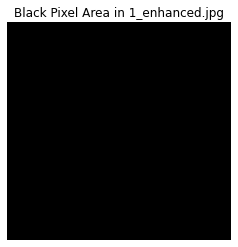

The area of black pixels within the selected polygon in 2_enhanced.jpg is: 0 square pixels


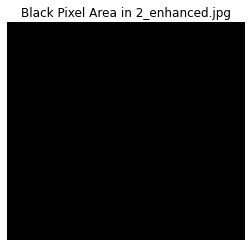

The area of black pixels within the selected polygon in 3_enhanced.jpg is: 0 square pixels


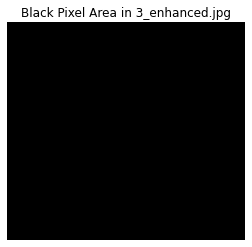

The area of black pixels within the selected polygon in 4_enhanced.jpg is: 7 square pixels


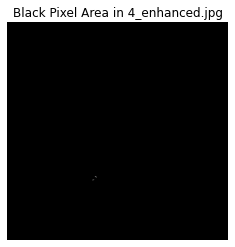

The area of black pixels within the selected polygon in 5_enhanced.jpg is: 16 square pixels


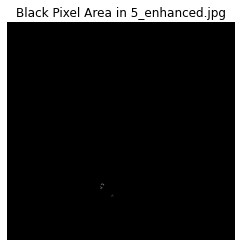

The area of black pixels within the selected polygon in 6_enhanced.jpg is: 185 square pixels


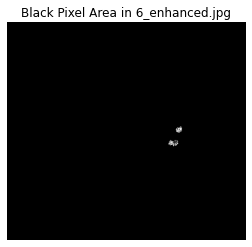

The area of black pixels within the selected polygon in 7_enhanced.jpg is: 383 square pixels


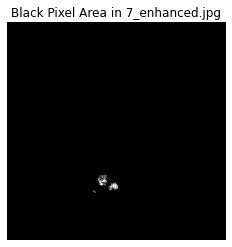

The area of black pixels within the selected polygon in 8_enhanced.jpg is: 731 square pixels


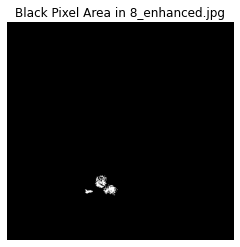

The area of black pixels within the selected polygon in 9_enhanced.jpg is: 348 square pixels


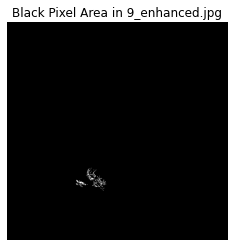

The area of black pixels within the selected polygon in 10_enhanced.jpg is: 1164 square pixels


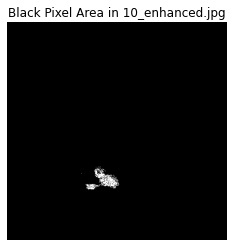

The area of black pixels within the selected polygon in 11_enhanced.jpg is: 1298 square pixels


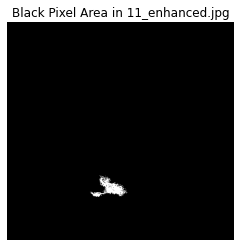

The area of black pixels within the selected polygon in 12_enhanced.jpg is: 1106 square pixels


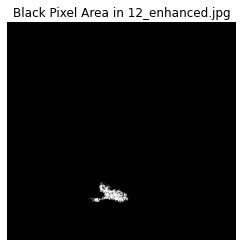

The area of black pixels within the selected polygon in 13_enhanced.jpg is: 999 square pixels


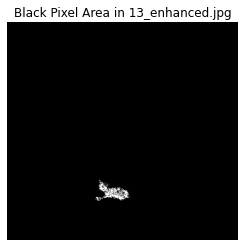

The area of black pixels within the selected polygon in 14_enhanced.jpg is: 1792 square pixels


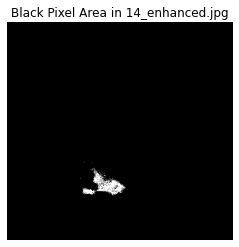

The area of black pixels within the selected polygon in 15_enhanced.jpg is: 1811 square pixels


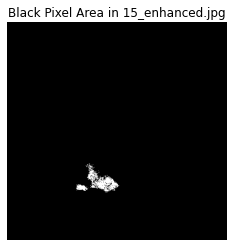

The area of black pixels within the selected polygon in 16_enhanced.jpg is: 2210 square pixels


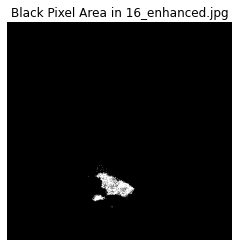

The area of black pixels within the selected polygon in 17_enhanced.jpg is: 2283 square pixels


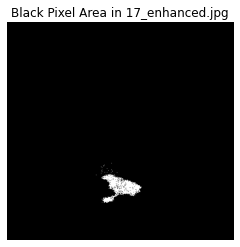

The area of black pixels within the selected polygon in 18_enhanced.jpg is: 2564 square pixels


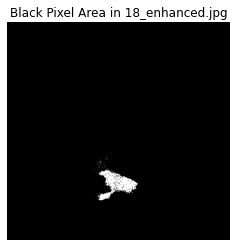

The area of black pixels within the selected polygon in 19_enhanced.jpg is: 2797 square pixels


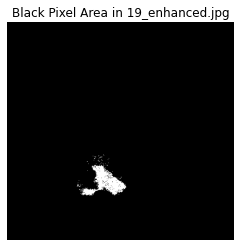

The area of black pixels within the selected polygon in 20_enhanced.jpg is: 1762 square pixels


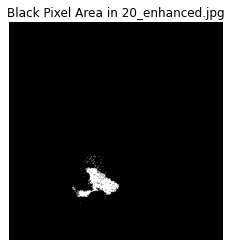

The area of black pixels within the selected polygon in 21_enhanced.jpg is: 1691 square pixels


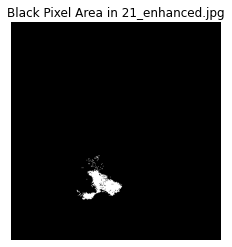

The area of black pixels within the selected polygon in 22_enhanced.jpg is: 1702 square pixels


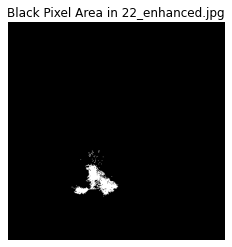

The area of black pixels within the selected polygon in 23_enhanced.jpg is: 1533 square pixels


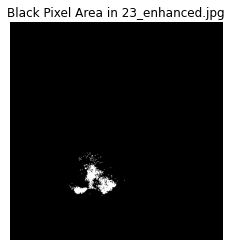

The area of black pixels within the selected polygon in 24_enhanced.jpg is: 1503 square pixels


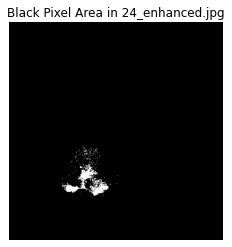

The area of black pixels within the selected polygon in 25_enhanced.jpg is: 1265 square pixels


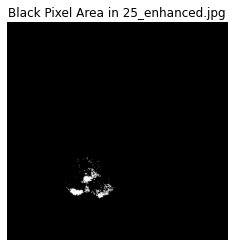

The area of black pixels within the selected polygon in 26_enhanced.jpg is: 866 square pixels


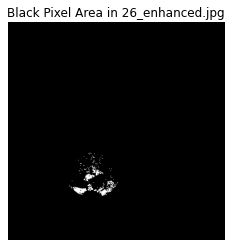

The area of black pixels within the selected polygon in 27_enhanced.jpg is: 689 square pixels


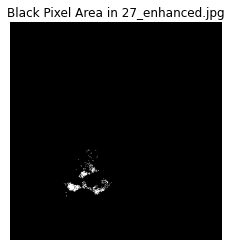

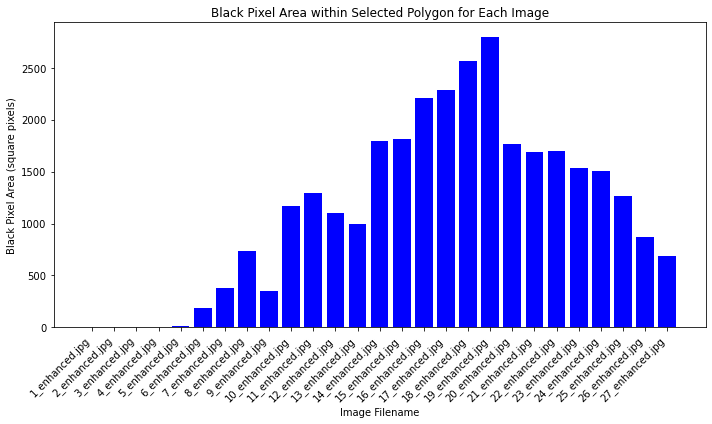

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Desired window size
window_width = 500
window_height = 400

# Source directory containing the images
source_directory = 'pixel_enhanced'

# Output directory for saving images with black pixel masks
output_directory = 'pixel_patch1'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize a list to store the points
points = []

# Initialize lists to store filenames and black pixel areas
filenames = []
black_pixel_areas = []

# Mouse callback function to store points
def mouse_callback(event, x, y, flags, param):
    global image_resized
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(image_resized, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Image', image_resized)

# Get a sorted list of filenames in the source directory
image_filenames = sorted([f for f in os.listdir(source_directory) if f.endswith(".jpg")], key=lambda x: int(x.split('_')[0]))

# Process each image in the sorted list
for filename in image_filenames:
    image_path = os.path.join(source_directory, filename)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Image not found at path: {image_path}")
        continue

    # Get the original dimensions of the image
    original_height, original_width = image.shape[:2]

    # Calculate the aspect ratio of the image
    aspect_ratio = original_width / original_height

    # Calculate new dimensions to fit within the desired window size
    if aspect_ratio > 1:
        new_width = window_width
        new_height = int(window_width / aspect_ratio)
    else:
        new_height = window_height
        new_width = int(window_height * aspect_ratio)

    # Resize the image
    image_resized = cv2.resize(image, (new_width, new_height))

    # Reset points for each image
    points = []

    # Create a window and set a mouse callback
    cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Image', window_width, window_height)
    cv2.setMouseCallback('Image', mouse_callback)

    # Display the image and wait for user input
    cv2.imshow('Image', image_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Check if at least 3 points were selected
    if len(points) < 3:
        print("You need at least 3 points to form a polygon")
        continue

    # Convert points to a numpy array
    pts = np.array(points, np.int32)
    pts = pts.reshape((-1, 1, 2))

    # Create a mask of the same size as the resized image, filled with zeros (black)
    mask = np.zeros(image_resized.shape[:2], dtype=np.uint8)

    # Fill the polygon on the mask with white (255)
    cv2.fillPoly(mask, [pts], 255)

    # Apply the mask to the resized image to get the region of interest
    roi = cv2.bitwise_and(image_resized, image_resized, mask=mask)

    # Convert the region of interest to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Create a binary mask where the black pixels in the ROI are white in the mask
    _, binary_mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    # Apply the polygon mask to the binary mask
    black_pixel_mask = cv2.bitwise_and(binary_mask, mask)

    # Calculate the number of black pixels in the masked area
    black_pixel_area = cv2.countNonZero(black_pixel_mask)

    print(f"The area of black pixels within the selected polygon in {filename} is: {black_pixel_area} square pixels")

    # Store the filename and black pixel area
    filenames.append(filename)
    black_pixel_areas.append(black_pixel_area)

    # Display the masked area using Matplotlib
    plt.figure()
    plt.title(f'Black Pixel Area in {filename}')
    plt.imshow(black_pixel_mask, cmap='gray')
    plt.axis('off')  # Turn off the axis

    # Save the image with the black pixel mask
    output_path = os.path.join(output_directory, f'{filename[:-4]}_masked.jpg')
    cv2.imwrite(output_path, black_pixel_mask)

    plt.savefig(output_path)
    plt.show()

# Plot the black pixel areas for each image
plt.figure(figsize=(10, 6))
plt.bar(filenames, black_pixel_areas, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('Black Pixel Area (square pixels)')
plt.title('Black Pixel Area within Selected Polygon for Each Image')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plot_output_path = os.path.join(output_directory, 'black_pixel_areas_plot.png')
plt.savefig(plot_output_path)
plt.show()

The area of black pixels within the selected polygon in 1_enhanced.jpg is: 0 square pixels


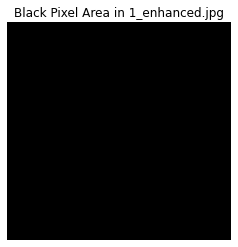

The area of black pixels within the selected polygon in 2_enhanced.jpg is: 0 square pixels


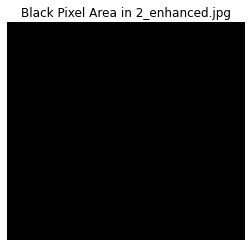

The area of black pixels within the selected polygon in 3_enhanced.jpg is: 0 square pixels


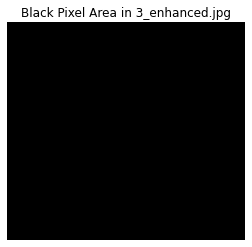

The area of black pixels within the selected polygon in 4_enhanced.jpg is: 6 square pixels


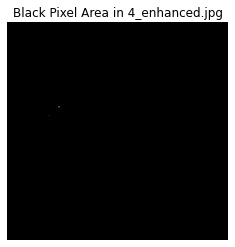

The area of black pixels within the selected polygon in 5_enhanced.jpg is: 11 square pixels


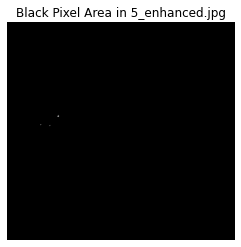

The area of black pixels within the selected polygon in 6_enhanced.jpg is: 4 square pixels


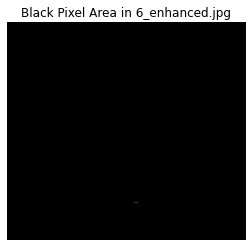

The area of black pixels within the selected polygon in 7_enhanced.jpg is: 288 square pixels


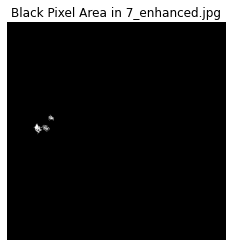

The area of black pixels within the selected polygon in 8_enhanced.jpg is: 547 square pixels


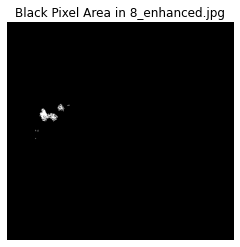

The area of black pixels within the selected polygon in 9_enhanced.jpg is: 241 square pixels


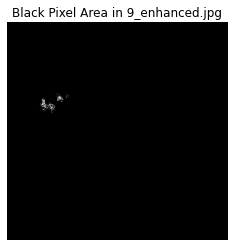

The area of black pixels within the selected polygon in 10_enhanced.jpg is: 986 square pixels


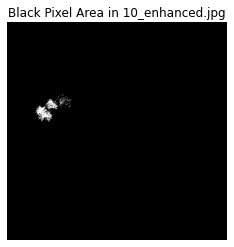

The area of black pixels within the selected polygon in 11_enhanced.jpg is: 1451 square pixels


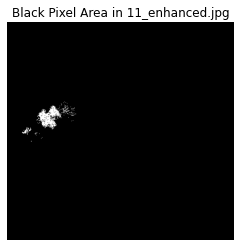

The area of black pixels within the selected polygon in 12_enhanced.jpg is: 1731 square pixels


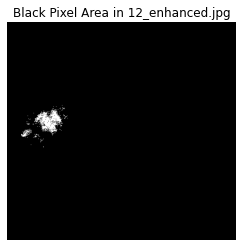

The area of black pixels within the selected polygon in 13_enhanced.jpg is: 2038 square pixels


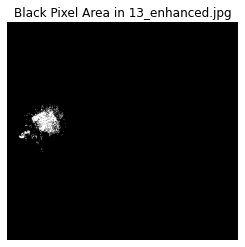

The area of black pixels within the selected polygon in 14_enhanced.jpg is: 3135 square pixels


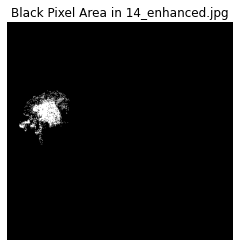

The area of black pixels within the selected polygon in 15_enhanced.jpg is: 2643 square pixels


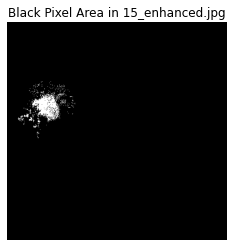

The area of black pixels within the selected polygon in 16_enhanced.jpg is: 3182 square pixels


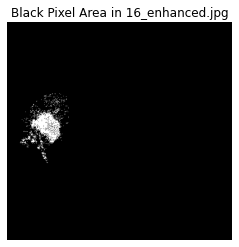

The area of black pixels within the selected polygon in 17_enhanced.jpg is: 2741 square pixels


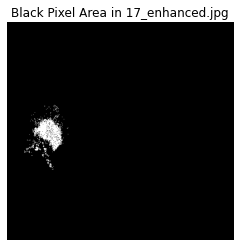

The area of black pixels within the selected polygon in 18_enhanced.jpg is: 3136 square pixels


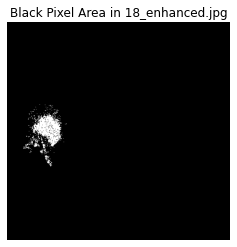

The area of black pixels within the selected polygon in 19_enhanced.jpg is: 4060 square pixels


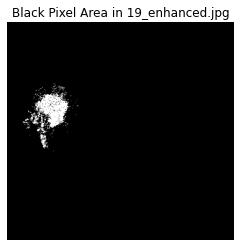

The area of black pixels within the selected polygon in 20_enhanced.jpg is: 2806 square pixels


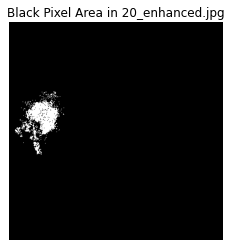

The area of black pixels within the selected polygon in 21_enhanced.jpg is: 2804 square pixels


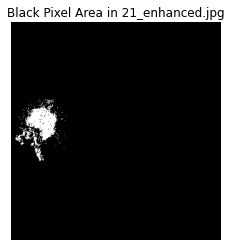

The area of black pixels within the selected polygon in 22_enhanced.jpg is: 2610 square pixels


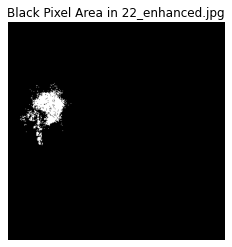

The area of black pixels within the selected polygon in 23_enhanced.jpg is: 2961 square pixels


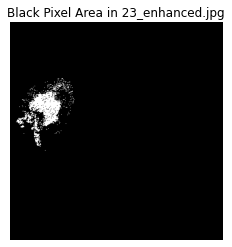

The area of black pixels within the selected polygon in 24_enhanced.jpg is: 3206 square pixels


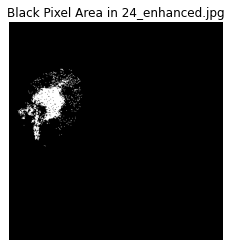

The area of black pixels within the selected polygon in 25_enhanced.jpg is: 4207 square pixels


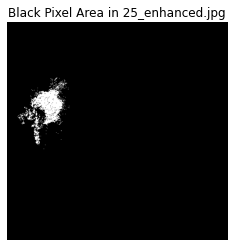

The area of black pixels within the selected polygon in 26_enhanced.jpg is: 3136 square pixels


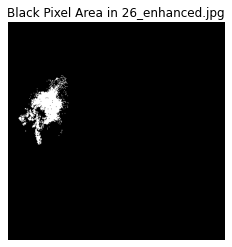

The area of black pixels within the selected polygon in 27_enhanced.jpg is: 2583 square pixels


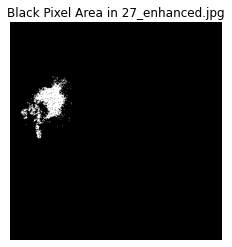

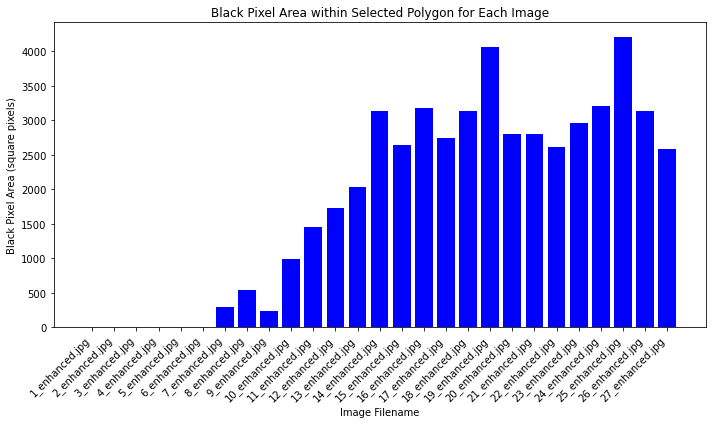

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Desired window size
window_width = 500
window_height = 400

# Source directory containing the images
source_directory = 'pixel_enhanced'

# Output directory for saving images with black pixel masks
output_directory = 'pixel_patch2'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize a list to store the points
points = []

# Initialize lists to store filenames and black pixel areas
filenames = []
black_pixel_areas = []

# Mouse callback function to store points
def mouse_callback(event, x, y, flags, param):
    global image_resized
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(image_resized, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Image', image_resized)

# Get a sorted list of filenames in the source directory
image_filenames = sorted([f for f in os.listdir(source_directory) if f.endswith(".jpg")], key=lambda x: int(x.split('_')[0]))

# Process each image in the sorted list
for filename in image_filenames:
    image_path = os.path.join(source_directory, filename)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Image not found at path: {image_path}")
        continue

    # Get the original dimensions of the image
    original_height, original_width = image.shape[:2]

    # Calculate the aspect ratio of the image
    aspect_ratio = original_width / original_height

    # Calculate new dimensions to fit within the desired window size
    if aspect_ratio > 1:
        new_width = window_width
        new_height = int(window_width / aspect_ratio)
    else:
        new_height = window_height
        new_width = int(window_height * aspect_ratio)

    # Resize the image
    image_resized = cv2.resize(image, (new_width, new_height))

    # Reset points for each image
    points = []

    # Create a window and set a mouse callback
    cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Image', window_width, window_height)
    cv2.setMouseCallback('Image', mouse_callback)

    # Display the image and wait for user input
    cv2.imshow('Image', image_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Check if at least 3 points were selected
    if len(points) < 3:
        print("You need at least 3 points to form a polygon")
        continue

    # Convert points to a numpy array
    pts = np.array(points, np.int32)
    pts = pts.reshape((-1, 1, 2))

    # Create a mask of the same size as the resized image, filled with zeros (black)
    mask = np.zeros(image_resized.shape[:2], dtype=np.uint8)

    # Fill the polygon on the mask with white (255)
    cv2.fillPoly(mask, [pts], 255)

    # Apply the mask to the resized image to get the region of interest
    roi = cv2.bitwise_and(image_resized, image_resized, mask=mask)

    # Convert the region of interest to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Create a binary mask where the black pixels in the ROI are white in the mask
    _, binary_mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    # Apply the polygon mask to the binary mask
    black_pixel_mask = cv2.bitwise_and(binary_mask, mask)

    # Calculate the number of black pixels in the masked area
    black_pixel_area = cv2.countNonZero(black_pixel_mask)

    print(f"The area of black pixels within the selected polygon in {filename} is: {black_pixel_area} square pixels")

    # Store the filename and black pixel area
    filenames.append(filename)
    black_pixel_areas.append(black_pixel_area)

    # Display the masked area using Matplotlib
    plt.figure()
    plt.title(f'Black Pixel Area in {filename}')
    plt.imshow(black_pixel_mask, cmap='gray')
    plt.axis('off')  # Turn off the axis

    # Save the image with the black pixel mask
    output_path = os.path.join(output_directory, f'{filename[:-4]}_masked.jpg')
    cv2.imwrite(output_path, black_pixel_mask)

    plt.savefig(output_path)
    plt.show()

# Plot the black pixel areas for each image
plt.figure(figsize=(10, 6))
plt.bar(filenames, black_pixel_areas, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('Black Pixel Area (square pixels)')
plt.title('Black Pixel Area within Selected Polygon for Each Image')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plot_output_path = os.path.join(output_directory, 'black_pixel_areas_plot.png')
plt.savefig(plot_output_path)
plt.show()

The area of black pixels within the selected polygon in 1_enhanced.jpg is: 0 square pixels


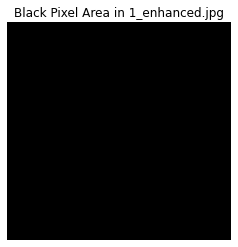

The area of black pixels within the selected polygon in 2_enhanced.jpg is: 0 square pixels


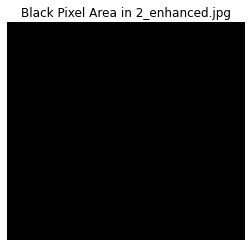

The area of black pixels within the selected polygon in 3_enhanced.jpg is: 0 square pixels


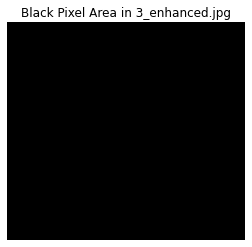

The area of black pixels within the selected polygon in 4_enhanced.jpg is: 3 square pixels


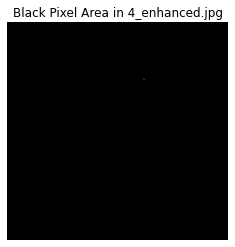

The area of black pixels within the selected polygon in 5_enhanced.jpg is: 5 square pixels


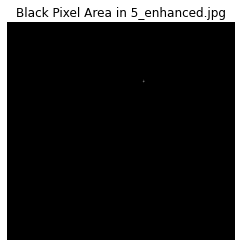

The area of black pixels within the selected polygon in 6_enhanced.jpg is: 24 square pixels


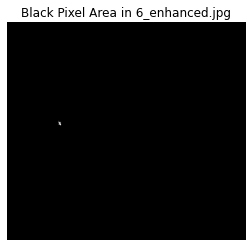

The area of black pixels within the selected polygon in 7_enhanced.jpg is: 272 square pixels


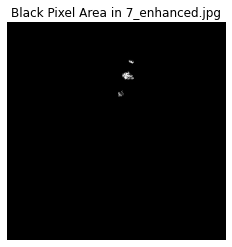

The area of black pixels within the selected polygon in 8_enhanced.jpg is: 270 square pixels


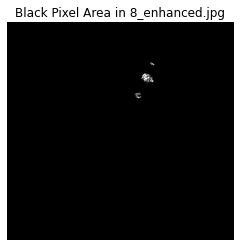

The area of black pixels within the selected polygon in 9_enhanced.jpg is: 255 square pixels


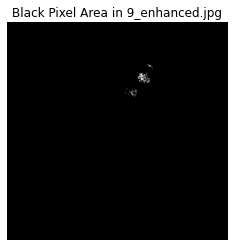

The area of black pixels within the selected polygon in 10_enhanced.jpg is: 643 square pixels


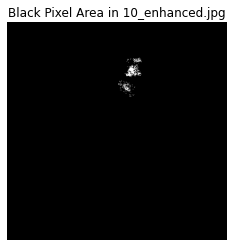

The area of black pixels within the selected polygon in 11_enhanced.jpg is: 1152 square pixels


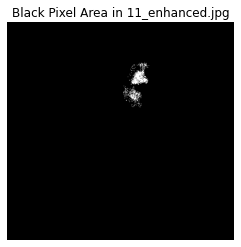

The area of black pixels within the selected polygon in 12_enhanced.jpg is: 1603 square pixels


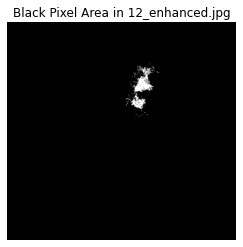

The area of black pixels within the selected polygon in 13_enhanced.jpg is: 2023 square pixels


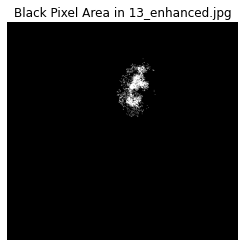

The area of black pixels within the selected polygon in 14_enhanced.jpg is: 2816 square pixels


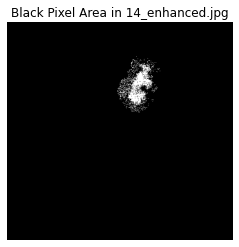

The area of black pixels within the selected polygon in 15_enhanced.jpg is: 2249 square pixels


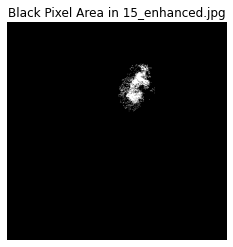

The area of black pixels within the selected polygon in 16_enhanced.jpg is: 2729 square pixels


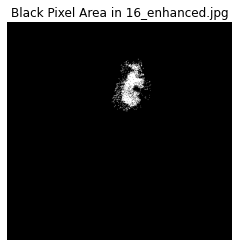

The area of black pixels within the selected polygon in 17_enhanced.jpg is: 2765 square pixels


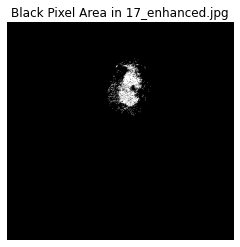

The area of black pixels within the selected polygon in 18_enhanced.jpg is: 2822 square pixels


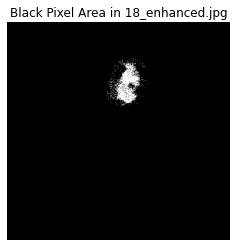

The area of black pixels within the selected polygon in 19_enhanced.jpg is: 3252 square pixels


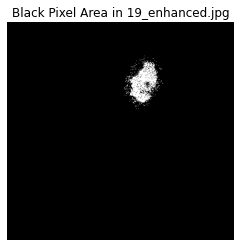

The area of black pixels within the selected polygon in 20_enhanced.jpg is: 2440 square pixels


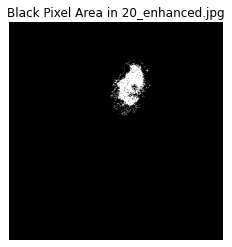

The area of black pixels within the selected polygon in 21_enhanced.jpg is: 2497 square pixels


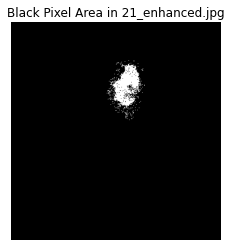

The area of black pixels within the selected polygon in 22_enhanced.jpg is: 2277 square pixels


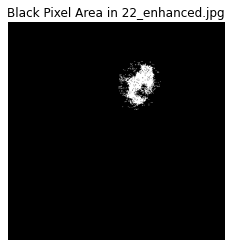

The area of black pixels within the selected polygon in 23_enhanced.jpg is: 2247 square pixels


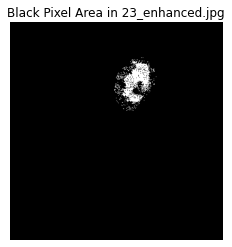

The area of black pixels within the selected polygon in 24_enhanced.jpg is: 2215 square pixels


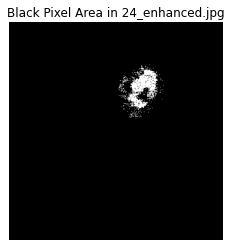

The area of black pixels within the selected polygon in 25_enhanced.jpg is: 3159 square pixels


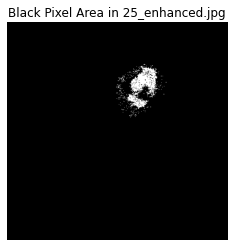

The area of black pixels within the selected polygon in 26_enhanced.jpg is: 2182 square pixels


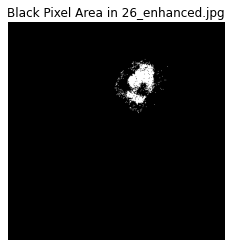

The area of black pixels within the selected polygon in 27_enhanced.jpg is: 1644 square pixels


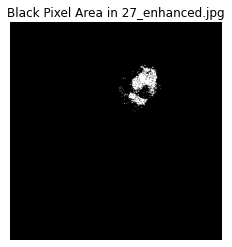

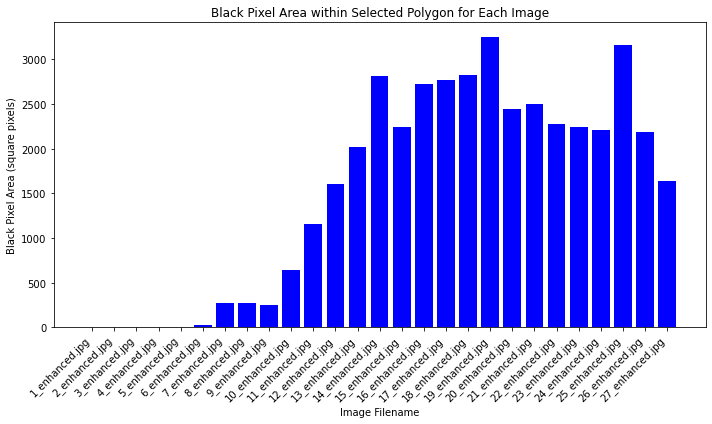

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Desired window size
window_width = 500
window_height = 400

# Source directory containing the images
source_directory = 'pixel_enhanced'

# Output directory for saving images with black pixel masks
output_directory = 'pixel_patch3'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize a list to store the points
points = []

# Initialize lists to store filenames and black pixel areas
filenames = []
black_pixel_areas = []

# Mouse callback function to store points
def mouse_callback(event, x, y, flags, param):
    global image_resized
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(image_resized, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Image', image_resized)

# Get a sorted list of filenames in the source directory
image_filenames = sorted([f for f in os.listdir(source_directory) if f.endswith(".jpg")], key=lambda x: int(x.split('_')[0]))

# Process each image in the sorted list
for filename in image_filenames:
    image_path = os.path.join(source_directory, filename)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Image not found at path: {image_path}")
        continue

    # Get the original dimensions of the image
    original_height, original_width = image.shape[:2]

    # Calculate the aspect ratio of the image
    aspect_ratio = original_width / original_height

    # Calculate new dimensions to fit within the desired window size
    if aspect_ratio > 1:
        new_width = window_width
        new_height = int(window_width / aspect_ratio)
    else:
        new_height = window_height
        new_width = int(window_height * aspect_ratio)

    # Resize the image
    image_resized = cv2.resize(image, (new_width, new_height))

    # Reset points for each image
    points = []

    # Create a window and set a mouse callback
    cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Image', window_width, window_height)
    cv2.setMouseCallback('Image', mouse_callback)

    # Display the image and wait for user input
    cv2.imshow('Image', image_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Check if at least 3 points were selected
    if len(points) < 3:
        print("You need at least 3 points to form a polygon")
        continue

    # Convert points to a numpy array
    pts = np.array(points, np.int32)
    pts = pts.reshape((-1, 1, 2))

    # Create a mask of the same size as the resized image, filled with zeros (black)
    mask = np.zeros(image_resized.shape[:2], dtype=np.uint8)

    # Fill the polygon on the mask with white (255)
    cv2.fillPoly(mask, [pts], 255)

    # Apply the mask to the resized image to get the region of interest
    roi = cv2.bitwise_and(image_resized, image_resized, mask=mask)

    # Convert the region of interest to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Create a binary mask where the black pixels in the ROI are white in the mask
    _, binary_mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

    # Apply the polygon mask to the binary mask
    black_pixel_mask = cv2.bitwise_and(binary_mask, mask)

    # Calculate the number of black pixels in the masked area
    black_pixel_area = cv2.countNonZero(black_pixel_mask)

    print(f"The area of black pixels within the selected polygon in {filename} is: {black_pixel_area} square pixels")

    # Store the filename and black pixel area
    filenames.append(filename)
    black_pixel_areas.append(black_pixel_area)

    # Display the masked area using Matplotlib
    plt.figure()
    plt.title(f'Black Pixel Area in {filename}')
    plt.imshow(black_pixel_mask, cmap='gray')
    plt.axis('off')  # Turn off the axis

    # Save the image with the black pixel mask
    output_path = os.path.join(output_directory, f'{filename[:-4]}_masked.jpg')
    cv2.imwrite(output_path, black_pixel_mask)

    plt.savefig(output_path)
    plt.show()

# Plot the black pixel areas for each image
plt.figure(figsize=(10, 6))
plt.bar(filenames, black_pixel_areas, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('Black Pixel Area (square pixels)')
plt.title('Black Pixel Area within Selected Polygon for Each Image')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plot_output_path = os.path.join(output_directory, 'black_pixel_areas_plot.png')
plt.savefig(plot_output_path)
plt.show()